Vinitha Palani (July 28, 2017)<br>
<br>
This contains examples and excercises from Allen Downey's ('Think stats' /'Think bayes') tutorial https://www.youtube.com/watch?v=He9MCbs1wgE.<br>
This tutorial uses Python to implement simple statistical experiments that develop deep understanding.<br>
<br>
Statistical inference :<br>
- Effect size
- Quantifying precision
- Hypothesis testing

##### Problems with statistics(conventional) now
Example ..new drug trail..50 patients were given old drug(mean self-reported pain score 4.1) .50 patients were given new drug(mean self-reported pain score 4.5). Statistical inference addresses the following :<br>
- How can we<b> estimate </b> the difference in the effect of the drugs? --"Effect size"
- How can we quantify the <b> precision </b> of that estimate ? --"Confidence interval"(and/or standard error)
- Is it possible that the apparent differnce is <b>due to chance</b>? --"p-value"

This is the order of importance !! Effect size > CI > p-value <br>
<font color="red"> But in conventional statistics they give importance to p-value and buries effect-size most often.</font> <br>
What ought to be done - <br>
- Report effect-size prominently
- In terms that we can interpret
- And provide context for comparison

In [1]:
import numpy
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
numpy.random.seed(17)

# some nice colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

%matplotlib inline

## Effect Size 
To explore statistics that quantify effect size, we'll look at the difference in height between men and women

In [3]:
mu1, sig1 = 178, 7.7
male_height = scipy.stats.norm(mu1, sig1)
mu2, sig2 = 163, 7.3
female_height = scipy.stats.norm(mu2, sig2)

In [4]:
male_height

The result is an rv object (which stands for random variable).

In [11]:
def eval_pdf(rv, num=4):
    """
    The following function evaluates the normal (Gaussian) probability density function (PDF) within
    4 standard deviations of the mean.It takes an rv object and returns a pair of NumPy arrays.
    The probability density function for norm is:
    norm.pdf(x) = exp(-x**2/2)/sqrt(2*pi) (standard normal distribution mu=0,sigma=1)
    """
    mean, std = rv.mean(), rv.std()
    xs = numpy.linspace(mean - num*std, mean + num*std, 100)
    ys = rv.pdf(xs)
    return xs, ys

The PDF(Probability Density Function) is used to specify the probability of the random variable falling within a particular range of values, as opposed to taking on any one value. This probability is given by the integral of this variable’s PDF over that range—that is, it is given by the area under the density function but above the horizontal axis and between the lowest and greatest values of the range. The probability density function is nonnegative everywhere, and its integral over the entire space is equal to one.

<b>Intuition for pdf : </b><br>
Suppose a species of bacteria typically lives 4 to 6 hours. What is the probability that a bacterium lives exactly 5 hours? The answer is 0%. A lot of bacteria live for approximately 5 hours, but there is no chance that any given bacterium dies at exactly 5.0000000000... hours.<br>
Instead we might ask: What is the probability that the bacterium dies between 5 hours and 5.01 hours? Let's say the answer is 0.02 (i.e., 2%). Next: What is the probability that the bacterium dies between 5 hours and 5.001 hours? The answer is probably around 0.002, since this is 1/10th of the previous interval. The probability that the bacterium dies between 5 hours and 5.0001 hours is probably about 0.0002, and so on.<br>
In these three examples, the ratio (probability of dying during an interval) / (duration of the interval) is approximately constant, and equal to 2 per hour (or 2 hour^−1). For example, there is 0.02 probability of dying in the 0.01-hour interval between 5 and 5.01 hours, and (0.02 probability / 0.01 hours) = 2 hour^−1. This quantity 2 hour^−1 is called the probability density for dying at around 5 hours.<br>
Therefore, in response to the question "What is the probability that the bacterium dies at 5 hours?", a literally correct but unhelpful answer is "0", but a better answer can be written as (2 hour^−1) dt. This is the probability that the bacterium dies within a small (infinitesimal) window of time around 5 hours, where dt is the duration of this window.
For example, the probability that it lives longer than 5 hours, but shorter than (5 hours + 1 nanosecond), is (2 hour^−1)×(1 nanosecond) ≃ 6×10−13 (using the unit conversion 3.6×1012 nanoseconds = 1 hour).<br>
There is a probability density function f with f(5 hours) = 2 hour^−1. The integral of f over any window of time (not only infinitesimal windows but also large windows) is the probability that the bacterium dies in that window.<br>

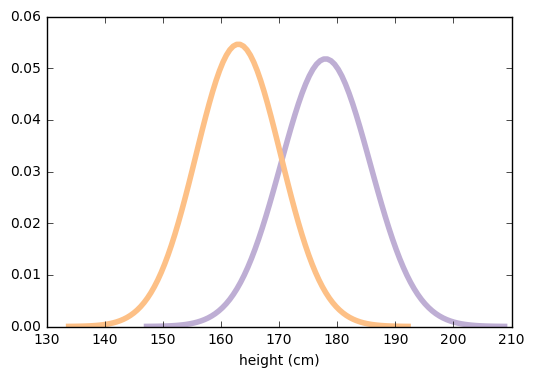

In [15]:
xs, ys = eval_pdf(male_height)
plt.plot(xs, ys, label='male', linewidth=4, color=COLOR2)
xs, ys = eval_pdf(female_height)
plt.plot(xs, ys, label='female', linewidth=4, color=COLOR3)
plt.xlabel('height (cm)')

<i> A probability mass function differs from a probability density function (pdf) in that the latter is associated with continuous rather than discrete random variables; the values of the probability density function are not probabilities as such: a pdf must be integrated over an interval to yield a probability. </i>

Let's assume for now that those are the true distributions for the population.
Let's use rvs to generate random samples from the population distributions. Note that these are totally random, totally representative samples, with no measurement error!

In [18]:
male_sample = male_height.rvs(1000)

In [19]:
female_sample = female_height.rvs(1000)

In [20]:
mean1, std1 = male_sample.mean(), male_sample.std()
mean1, std1

(178.16511665818112, 7.8419961712899502)

population parameters - mu1, sig1 = 178, 7.7 approximately equal to sample statistics

In [21]:
mean2, std2 = female_sample.mean(), female_sample.std()
mean2, std2

(163.48610226651135, 7.382384919896662)

population parameters- mu2, sig2 = 163, 7.3 approximately equal to sample statistics

In [23]:
difference_in_means = male_sample.mean() - female_sample.mean()
difference_in_means # in cm

14.679014391669767

On average, men are 14--15 centimeters taller. For some applications, that would be a good way to describe the difference, but there are a few problems:<br>
Without knowing more about the distributions (like the standard deviations) it's hard to interpret whether a difference like 15 cm is a lot or not.<br>
The magnitude of the difference depends on the units of measure, making it hard to compare across different studies.<br>
There are a number of ways to quantify the difference between distributions. A simple option is to express the difference as a percentage of the mean.

In [26]:
(difference_in_means  / male_sample.mean()) * 100

8.2389946286916569

In [27]:
(difference_in_means  / female_sample.mean()) * 100

8.9787536605040401

There is obvious right denominator (may be use the global mean for both groups)

An alternative way to express the difference between distributions is to see how much they overlap. To define overlap, we choose a threshold between the two means. The simple threshold is the midpoint between the means:

In [29]:
simple_thresh = (mean1 + mean2) / 2
simple_thresh

170.82560946234622

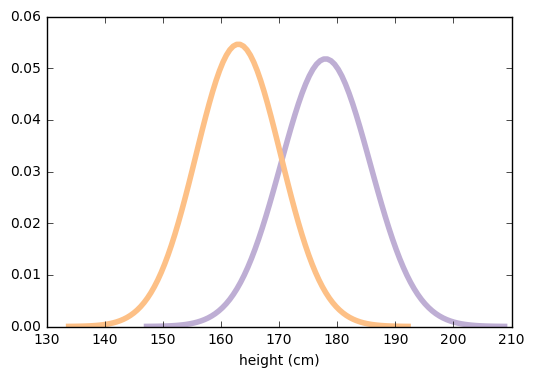

In [31]:
xs, ys = eval_pdf(male_height)
plt.plot(xs, ys, label='male', linewidth=4, color=COLOR2)
xs, ys = eval_pdf(female_height)
plt.plot(xs, ys, label='female', linewidth=4, color=COLOR3)
plt.xlabel('height (cm)')

A better, but slightly more complicated threshold is the place where the PDFs cross.

In [32]:
thresh = (std1 * mean2 + std2 * mean1) / (std1 + std2)
thresh

170.6040359174722

In this example, there's not much difference between the two thresholds (Mean of means works as well as the weighted mean of means because the sample size is the same).<br>
Now we can count how many men are below the threshold:

In [33]:
male_below_thresh = sum(male_sample < thresh)
male_below_thresh

164

In [34]:
female_above_thresh = sum(female_sample > thresh)
female_above_thresh

174

In [35]:
male_overlap = male_below_thresh / len(male_sample)
female_overlap = female_above_thresh / len(female_sample)
male_overlap, female_overlap

(0.16400000000000001, 0.17399999999999999)

In practical terms, you might report the fraction of people who would be misclassified if you tried to use height to guess sex, which is the average of the male and female overlap rates:

In [36]:
misclassification_rate = (male_overlap + female_overlap) / 2
misclassification_rate

0.16899999999999998

Another way to quantify the difference between distributions is what's called "probability of superiority", which is a problematic term, but in this context it's the probability that a randomly-chosen man is taller than a randomly-chosen woman.

Suppose I choose a man and a woman at random. What is the probability that the man is taller?

In [64]:
import numpy as np
num_men_taller = np.where(male_sample > female_sample)

In [65]:
len(num_men_taller[0])

911

In [68]:
prob_man_taller = len(num_men_taller[0])/ len(male_sample)
prob_man_taller

0.911

In [70]:
#Allen's solution 
(male_sample > female_sample).mean() 

0.91100000000000003

In [74]:
def overlap_superiority(control, treatment, n=1000):
    """Estimates overlap and superiority based on a sample.
    
    control: scipy.stats rv object
    treatment: scipy.stats rv object
    n: sample size
    """
    control_sample = control.rvs(n)
    treatment_sample = treatment.rvs(n)
    thresh = (control.mean() + treatment.mean()) / 2
    
    control_above = sum(control_sample > thresh)
    treatment_below = sum(treatment_sample < thresh)
    overlap = (control_above + treatment_below) / n
    
    superiority = (treatment_sample > control_sample).mean()
    return overlap, superiority

Overlap (or misclassification rate) and "probability of superiority" have two good properties:
As probabilities, they don't depend on units of measure, so they are comparable between studies.
They are expressed in operational terms, so a reader has a sense of what practical effect the difference makes.

##### Cohen's effect size
There is one other common way to express the difference between distributions. Cohen's  is quantifying difference in means, standardized by dividing by the standard deviation.What is tricky here is to decide which standard deviation to use.That is saying difference between these groups is some number of standard deviation.And we dont want to use the standard deviation of the two groups together because we they are really two groups then the global standarddeviation would be quite big compared to the individual stds.Thats why we use the weighted mean of the two stds.
As the numerator and denominator units cancel out , Cohen's d is unitless hence can be used across studies. 
Here's the math notation:
$$d = \frac{\bar{x_{1}} - \bar{x_{2}}}{s}$$
where  is the pooled standard deviation(measure of variability within the group):
$$s = \sqrt{\frac{(n_1 -1)s_{1}^2 + (n_2 -1)s_{2}^2}{n_1 + n_2 - 2}}$$

Here's a function that computes it:

In [72]:
#Computing the denominator is a little complicated; in fact, people have proposed several ways to do it. 
#This implementation uses the "pooled standard deviation", 
#which is a weighted average of the standard deviations of the two groups.

def CohenEffectSize(group1, group2):
    """Compute Cohen's d.

    group1: Series or NumPy array
    group2: Series or NumPy array

    returns: float
    """
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / numpy.sqrt(pooled_var)
    return d

In [73]:
#putting it to use 
CohenEffectSize(male_sample, female_sample)

1.9274780043619493

In [76]:
def plot_pdfs(cohen_d=2):
    """Plot PDFs for distributions that differ by some number of stds.
    
    cohen_d: number of standard deviations between the means
    """
    control = scipy.stats.norm(0, 1)
    treatment = scipy.stats.norm(cohen_d, 1)
    xs, ys = eval_pdf(control)
    plt.fill_between(xs, ys, label='control', color=COLOR3, alpha=0.7)

    xs, ys = eval_pdf(treatment)
    plt.fill_between(xs, ys, label='treatment', color=COLOR2, alpha=0.7)
    
    o, s = overlap_superiority(control, treatment)
    plt.text(0, 0.05, 'overlap ' + str(o))
    plt.text(0, 0.15, 'superiority ' + str(s))
    plt.show()
    #print('overlap', o)
    #print('superiority', s)

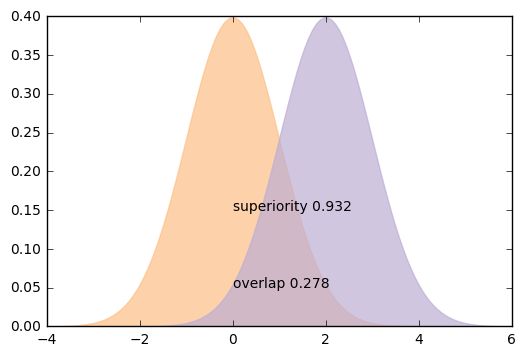

In [77]:
plot_pdfs(2)

In [78]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

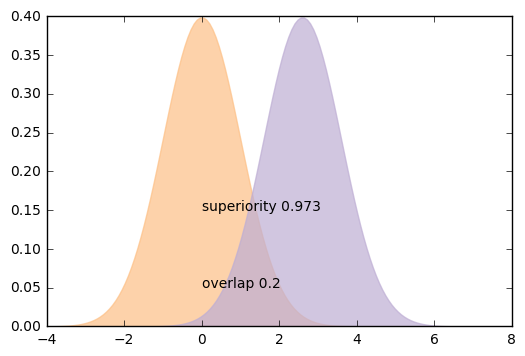

In [79]:
slider = widgets.FloatSlider(min=0, max=4, value=2)
interact(plot_pdfs, cohen_d=slider)

when cohen effect size less than 0.5 not relevant 
3, 4 or 5 may be not.What is a large or small effect is highly dependent on your specific field of study, and even a small effect can be theoretically meaningful.<br>


Cohen's  has a few nice properties:<br>
Because mean and standard deviation have the same units, their ratio is dimensionless, so we can compare  across different studies.<br>
In fields that commonly use , people are calibrated to know what values should be considered big, surprising, or important.
Given  (and the assumption that the distributions are normal), you can compute overlap, superiority, and related statistics.
<br>
In summary, the best way to report effect size depends on the audience and your goals. There is often a tradeoff between summary statistics that have good technical properties and statistics that are meaningful to a general audience.<br>

#### Difference in proportions
LEAP study <br>
A clinical trial investigating how to best prevent Peanut Allergy.<br>
Should young children eat peanuts or avoid them? Which is a better approach to preventing peanut allergy?<br>
<em>
Of the children who avoided peanut, 17% developed peanut allergy by the age of 5 years. Remarkably, only 3% of the children who were randomized to eating the peanut snack developed allergy by age 5.   Therefore, in high-risk infants, sustained consumption of peanut beginning in the first 11 months of life was highly effective in preventing the development of peanut allergy.
</em><br>
If you were to summarize that using a single number (comparable across studies) to show the magnitude of this effect.
<br> like you are talking to a parent who wants to decide if they want to give peanuts to their kid.<br>
- children who avoided are 5 times more likely to develop peanut allergy
- Percentage decrease ..Administering peanuts decreases allergy rates by 83% ..but asymmetry problem .."Avoinding peanuts increases allergy rates by 467%" That is kind of awkward
- 14 percentage points(diff between percentages)..Eating peanuts decreases chances of allergy by 14 percentage points or eating peanuts increases chance of allergy by 14 percentage points..here we can use either way as it is not clear which is contraol group and which one is treatment group.But percentage points are not created equal ..from 3% to 17% is a big deal , from 43% to 57% might not be and from 0.1 to 14.1 may be huge !
- odds ratio 
  - odds = p / (1-p)
  - p1 = 0.03 , p2 = 0.17
  - o1 = 0.0309 , o2 = 0.2048 
  - OR = o1 / o2 = 0.151  
  (eating peanuts decreases allergy rates (OR = 0.15) or avoiding peanuts incraeses allergy rates (OR = 6.6))
- Log odds ratio 
   log of the ratio --  difference in the log of the two odds -- same magnitude but different signs  
   (eating peanuts decreases allergy rates (LOR = -0.82) or avoiding peanuts incraeses allergy rates (OR = 0.82))
   
From Wikipedia<br>

In statistics, the odds ratio (OR)[1][2][3] is one of three main ways to quantify how strongly the presence or absence of property A is associated with the presence or absence of property B in a given population. If each individual in a population either does or does not have a property "A", (e.g. "high blood pressure"), and also either does or does not have a property "B" (e.g. "moderate alcohol consumption") where both properties are appropriately defined, then a ratio can be formed which quantitatively describes the association between the presence/absence of "A" (high blood pressure) and the presence/absence of "B" (moderate alcohol consumption) for individuals in the population. This ratio is the odds ratio (OR) and can be computed following these steps:<br>
- For a given individual that has "B" compute the odds that the same individual has "A"
- For a given individual that does not have "B" compute the odds that the same individual has "A"
- Divide the odds from step 1 by the odds from step 2 to obtain the odds ratio (OR).

The term "individual" in this usage does not have to refer to a human being, as a statistical population can measure any set of entities, whether living or inanimate.<br>
If the OR is greater than 1, then having "A" is considered to be "associated" with having "B" in the sense that the having of "B" raises (relative to not-having "B") the odds of having "A". Note that this does not establish that B is a contributing cause of "A": it could be that the association is due to a third property, "C", which is a contributing cause of both "A" and "B" (confounding). The odds ratio compares the occurrence of the outcome in the presence of a particular exposure, with the occurrence of the outcome in the absence of a particular exposure.<br>
In a more technical language, the OR is a measure of effect size, describing the strength of association or non-independence between two binary data values. It is used as a descriptive statistic, and plays an important role in logistic regression.<br>
Suppose that in a sample of 100 men, 90 drank wine in the previous week, while in a sample of 100 women only 20 drank wine in the same period. The odds of a man drinking wine are 90 to 10, or 9:1, while the odds of a woman drinking wine are only 20 to 80, or 1:4 = 0.25:1. The odds ratio is thus 9/0.25, or 36, showing that men are much more likely to drink wine than women. 
This example also shows how odds ratios are sometimes sensitive in stating relative positions: in this sample men are 90/20 = 4.5 times as likely to have drunk wine than women, but have 36 times the odds. The logarithm of the odds ratio, the difference of the logits of the probabilities, tempers this effect, and also makes the measure symmetric with respect to the ordering of groups. For example, using natural logarithms, an odds ratio of 36/1 maps to 3.584, and an odds ratio of 1/36 maps to −3.584.<br>
How to make sense of log-odd-ratio ? It is the Bayes factor(measure of information content).
In statistics, the use of Bayes factors is a Bayesian alternative to classical hypothesis testing. Bayesian model comparison is a method of model selection based on Bayes factors. Check https://en.wikipedia.org/wiki/Bayes_factor interpretation table.<br>
But this is not to be taken as gospel as this varies from context to context.<br>
Obvious downside is lack of familiarity.<br>
Summary :<br>
Rule 1: Choose a measure of effect size that is meaningful in context.<br>
Rule 2: The estimated effect size is the most important result .Everything else is auxillary.<br>

## Quantifying precision
Suppose you wants to know the distribution of weights for adults in the US.You do a telephone survey using random numbers from a phone book.Whoever answers the phone , you ask for their weight and right it down.<br>
Why is this not a good methodology?<br>
- 1) People may lie about their weight.(falls under measurement error)
- 2) Not representative (poor people might not have phones)-- sampling bias -- approximately representative is good 
- 3) measurement error 
- 4) random error after all you collected sample not the population 
Sampling bias - hard to quantify <br>
measurement error - sometimes quantifiable <br>
random error - relatively easy to quantify(this gets disproportionate attention hence) <br>
It is common to discuss the first two quanlitatively and quantify the third<br>
Suppose we want to estimate the average weight of men and women in the U.S.
And we want to quantify the uncertainty of the estimate.
One approach is to simulate many experiments and see how much the results vary from one experiment to the next.<br>
We will start with the unrealistic assumption that we know the actual distribution of weights in the population. T
Based on data from the BRFSS, the distribution of weight in kg for women in the U.S. is well modeled by a lognormal distribution with the following parameters:

In [82]:
weight = scipy.stats.lognorm(0.23, 0, 70.8)
weight.mean(), weight.std()

(72.697645732966876, 16.944043048498038)

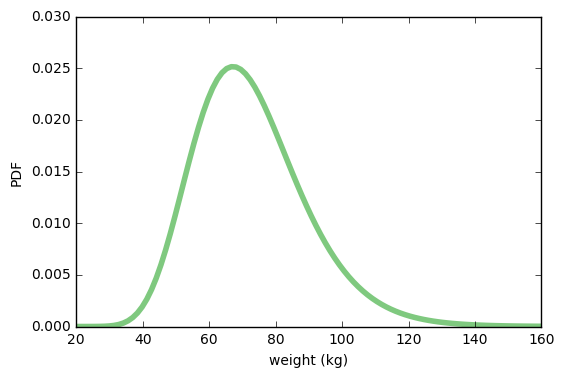

In [83]:
xs = numpy.linspace(20, 160, 100)
ys = weight.pdf(xs)
plt.plot(xs, ys, linewidth=4, color=COLOR1)
plt.xlabel('weight (kg)')
plt.ylabel('PDF')

Central tendency towards 60-66 kg ..but then there are heavy people at 120 -160 range. turns out there is  a reason for this distribution at birth the distribution is gaussian but as we get older the distribution becomes log normal.<br>


In [84]:
#make_sample draws a random sample from this distribution
def make_sample(n=100):
    sample = weight.rvs(n)
    return sample

In [85]:
sample = make_sample(n=100)
sample.mean(), sample.std()

(71.844204271696668, 18.178010808093955)

In [86]:
def sample_stat(sample):
    return sample.mean()

In [88]:
#One iteration of "the experiment" is to collect a sample of 100 women and compute their average weight.
#We can simulate running this experiment many times, and collect a list of sample statistics. The result is a NumPy array.
def compute_sampling_distribution(n=100, iters=1000):
    stats = [sample_stat(make_sample(n)) for i in range(iters)]
    return numpy.array(stats)

In [89]:
sample_means = compute_sampling_distribution(n=100, iters=1000)

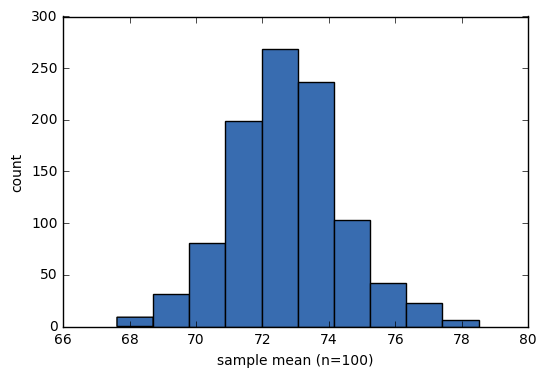

In [90]:
#Let's look at the sampling distribution of the means. This distribution shows how much the results vary from one experiment to the next.
#Remember that this distribution is not the same as the distribution of weight in the population. This is the distribution of results across repeated imaginary experiments.
# therefore quatifying quantifying random error
plt.hist(sample_means, color=COLOR5)
plt.xlabel('sample mean (n=100)')
plt.ylabel('count')

This will asymptotically be whole like a normal distribution.(central limit theorem)

In [91]:
sample_means.mean()

72.732868777846562

The standard deviation of the sample means quantifies the variability(thereby quatifying uncertainity) from one experiment to the next, and reflects the precision of the estimate.
This quantity is called the "standard error".

In [92]:
std_err = sample_means.std()
std_err

1.6930184486243498

In [93]:
conf_int = numpy.percentile(sample_means, [5, 95])
conf_int

array([ 69.96503017,  75.75267738])

In [114]:
#summarize sampling distribution 
print("SE :", std_err)
print("90% CE", conf_int)

SE : 1.69301844862
90% CE [ 69.96503017  75.75267738]


In [94]:
def plot_sampling_distribution(n, xlim=None):
    """Plot the sampling distribution.
    
    n: sample size
    xlim: [xmin, xmax] range for the x axis 
    """
    sample_stats = compute_sampling_distribution(n, iters=1000)
    se = numpy.std(sample_stats)
    ci = numpy.percentile(sample_stats, [5, 95])
    
    plt.hist(sample_stats, color=COLOR2)
    plt.xlabel('sample statistic')
    plt.xlim(xlim)
    text(0.03, 0.95, 'CI [%0.2f %0.2f]' % tuple(ci))
    text(0.03, 0.85, 'SE %0.2f' % se)
    plt.show()
    
def text(x, y, s):
    """Plot a string at a given location in axis coordinates.
    
    x: coordinate
    y: coordinate
    s: string
    """
    ax = plt.gca()
    plt.text(x, y, s,
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax.transAxes)

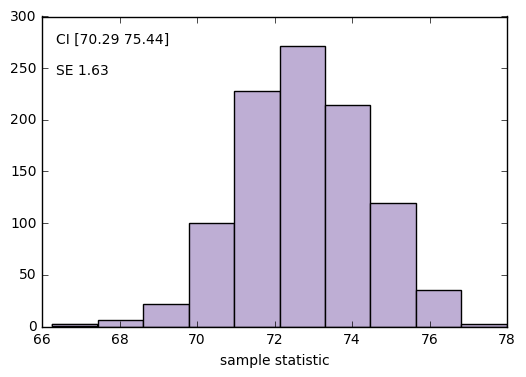

In [95]:
plot_sampling_distribution(100)

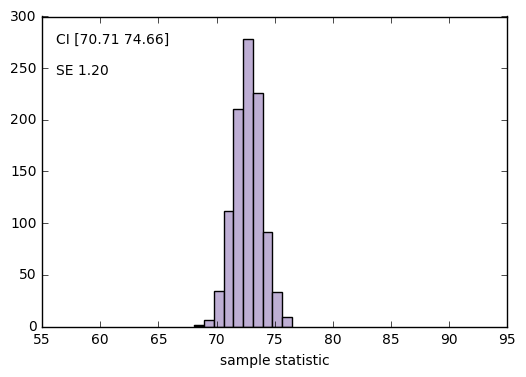

In [96]:
def sample_stat(sample):
    return sample.mean()

slider = widgets.IntSlider(min=10, max=1000, value=100)
interact(plot_sampling_distribution, n=slider, xlim=fixed([55, 95]))

This framework works with any other quantity we want to estimate. By changing sample_stat, you can compute the SE and CI for any sample statistic.<br>
Exercise : Fill in sample_stat below with any of these statistics:
- Standard deviation of the sample.
- Coefficient of variation, which is the sample standard deviation divided by the sample standard mean.
- Min or Max
- Median (which is the 50th percentile)
- 10th or 90th percentile.
- Interquartile range (IQR), which is the difference between the 75th and 25th percentiles.
NumPy array methods you might find useful include std, min, max, and percentile. Depending on the results, you might want to adjust xlim.

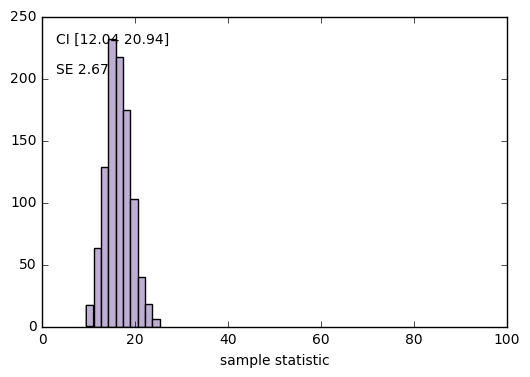

In [97]:
def sample_stat(sample):
    # TODO: replace the following line with another sample statistic
    return sample.std()

slider = widgets.IntSlider(min=10, max=1000, value=100)
interact(plot_sampling_distribution, n=slider, xlim=fixed([0, 100]))

So far we have shown that if we know the actual distribution of the population, we can compute the sampling distribution for any sample statistic, and from that we can compute SE and CI.
But in real life we don't know the actual distribution of the population. If we did, we wouldn't be doing statistical inference in the first place!In real life, we use the sample to build a model of the population distribution, then use the model to generate the sampling distribution. A simple and popular way to do that is "resampling," which means we use the sample itself as a model of the population distribution and draw samples from it.This class represents a framework for computing sampling distributions.

In [98]:
class Resampler(object):
    """Represents a framework for computing sampling distributions."""
    
    def __init__(self, sample, xlim=None):
        """Stores the actual sample."""
        self.sample = sample
        self.n = len(sample)
        self.xlim = xlim
        
    def resample(self):
        """Generates a new sample by choosing from the original
        sample with replacement.
        """
        new_sample = numpy.random.choice(self.sample, self.n, replace=True)
        return new_sample
    
    def sample_stat(self, sample):
        """Computes a sample statistic using the original sample or a
        simulated sample.
        """
        return sample.mean()
    
    def compute_sampling_distribution(self, iters=1000):
        """Simulates many experiments and collects the resulting sample
        statistics.
        """
        stats = [self.sample_stat(self.resample()) for i in range(iters)]
        return numpy.array(stats)
    
    def plot_sampling_distribution(self):
        """Plots the sampling distribution."""
        sample_stats = self.compute_sampling_distribution()
        se = sample_stats.std()
        ci = numpy.percentile(sample_stats, [5, 95])
    
        plt.hist(sample_stats, color=COLOR2)
        plt.xlabel('sample statistic')
        plt.xlim(self.xlim)
        text(0.03, 0.95, 'CI [%0.2f %0.2f]' % tuple(ci))
        text(0.03, 0.85, 'SE %0.2f' % se)

In [100]:
def interact_func(n, xlim):
    sample = weight.rvs(n)
    resampler = Resampler(sample, xlim=xlim)
    resampler.plot_sampling_distribution()
    plt.show()

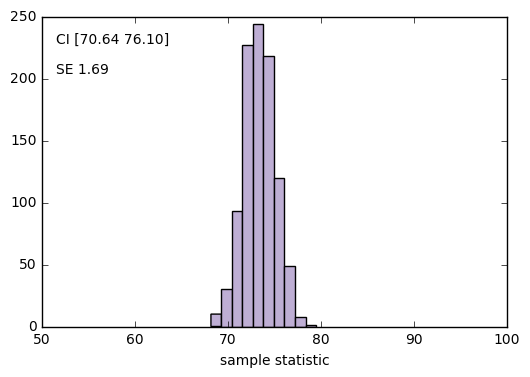

In [101]:
interact_func(n=100, xlim=[50, 100])

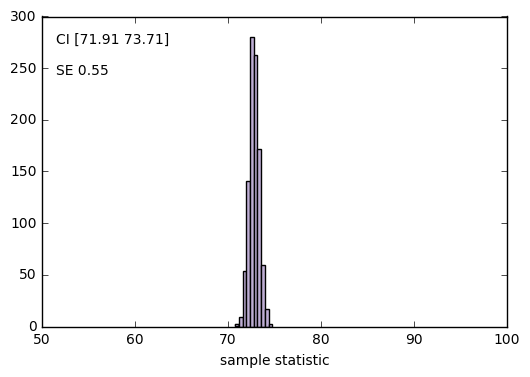

In [102]:
slider = widgets.IntSlider(min=10, max=1000, value=100)
interact(interact_func, n=slider, xlim=fixed([50, 100]))


Exercise 2: write a new class called StdResampler that inherits from Resampler and overrides sample_stat so it computes the standard deviation of the resampled data.

In [103]:
class StdResampler(Resampler):   
    """Computes the sampling distribution of the standard deviation."""
    
    def sample_stat(self, sample):
        """Computes a sample statistic using the original sample or a
        simulated sample.
        """
        return sample.std()

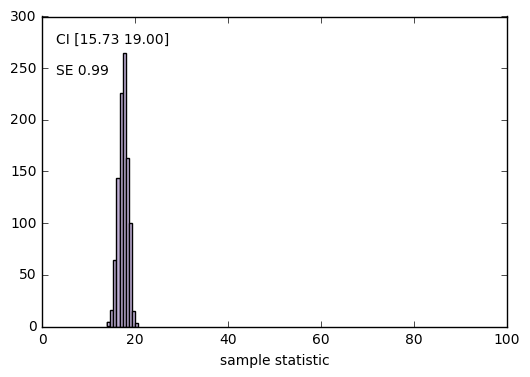

In [104]:
def interact_func2(n, xlim):
    sample = weight.rvs(n)
    resampler = StdResampler(sample, xlim=xlim)
    resampler.plot_sampling_distribution()
    
interact_func2(n=100, xlim=[0, 100])

<function __main__.interact_func2>

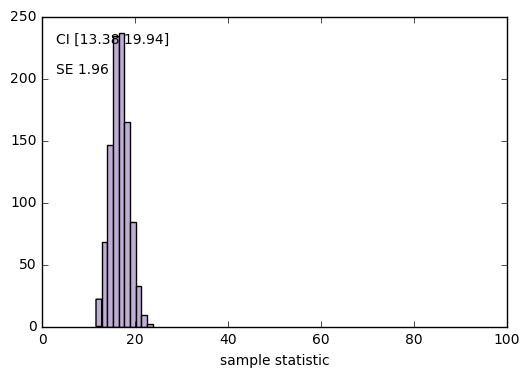

In [105]:
slider = widgets.IntSlider(min=10, max=1000, value=100)
interact(interact_func2, n=slider, xlim=fixed([0, 100]))


We can extend this framework to compute SE and CI for a difference in means.

In [107]:
female_weight = scipy.stats.lognorm(0.23, 0, 70.8)
female_weight.mean(), female_weight.std()

(72.697645732966876, 16.944043048498038)

In [108]:
male_weight = scipy.stats.lognorm(0.20, 0, 87.3)
male_weight.mean(), male_weight.std()

(89.063576984335782, 17.992335889366288)

In [109]:
female_sample = female_weight.rvs(100)
male_sample = male_weight.rvs(100)

In [110]:
male_sample.mean() - female_sample.mean()

19.958846847124107

The difference in means should be about 17 kg, but will vary from one random sample to the next:

In [111]:
class CohenResampler(Resampler):
    def __init__(self, group1, group2, xlim=None):
        self.group1 = group1
        self.group2 = group2
        self.xlim = xlim
        
    def resample(self):
        n, m = len(self.group1), len(self.group2)
        group1 = numpy.random.choice(self.group1, n, replace=True)
        group2 = numpy.random.choice(self.group2, m, replace=True)
        return group1, group2
    
    def sample_stat(self, groups):
        group1, group2 = groups
        return CohenEffectSize(group1, group2)

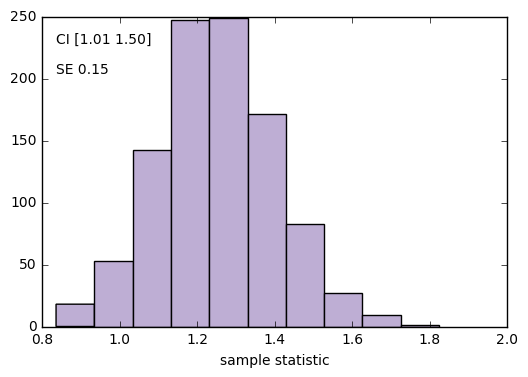

In [112]:
resampler = CohenResampler(male_sample, female_sample)
resampler.plot_sampling_distribution()

This example demonstrates an advantage of the computational framework over mathematical analysis. Statistics like Cohen's , which is the ratio of other statistics, are relatively difficult to analyze. But with a computational approach, all sample statistics are equally "easy".<br>
One note on vocabulary:  "resampling" here is a specific kind of resampling called "bootstrapping". Other techniques that are also considering resampling include permutation tests, which we'll see in the next section, and "jackknife" resampling. You can read more at http://en.wikipedia.org/wiki/Resampling_(statistics).<br>
You could take your sample and build a smooth analytic distribution that fits your data and draw random samples from this.--alternative to bootstrapping.<br> 

This computational methodology will work in cases where the central limit theorem will not , example if the data is a Pareto distribution which does not have a finite mean or std dev(Pareto originally used this distribution to describe the allocation of wealth among individuals since it seemed to show rather well the way that a larger portion of the wealth of any society is owned by a smaller percentage of the people in that society. He also used it to describe distribution of income.[8] This idea is sometimes expressed more simply as the Pareto principle or the "80-20 rule" which says that 20% of the population controls 80% of the wealth.). We may have to crank up the no.of iters because of the huge variance.(more than 1000 --most cases 1000 is a magic number).

If i have a long tail distribution and there will be things that i havent seen .. we need a methodology that would get me from the sample to the long tail distribution. that is when the second approach..using a smoothed analytic distribution to model the data and drawing random samples from that.

Suppose we have a bimodel distribution -- our sampling distribution will still be unimodal , but choosing the mean as the smaple statistic is probably going to be wrong

Review questions -<br>
1) What's the difference between standard deviation and standard error?

standard deviation is about the population and standard error is about your estimate(my uncertainity due to random sampling).

2) In the BRFSS sample, the average male height is 178.5024 cm, and the 95% CI is [178.5018 178.5031]cm.What is the probability that the actual population average is in this range(.003 cm)? 

Two answers to this question - 
From a philosophical point of view this is a black hole that has led to countless debates (Frequentist vs bayesian interpretation of probability). the actual population mean is not a random variable(albeit unknown) therefore it is meaningless to talk about the probabability that it falls in an interval.<br>

Simple answer is that probability is 0.Because the only thing that we quantifies is the uncertainty due to random sampling meanwhile we totally ignored sampling bias, measurement error and other 20 thing edward tufte warned us about.The CI only accounts for the random error as the sample size increases the CI gets smaller and the other errors dominate.Therefore CI from large samples are less likely to contain the actual value.<br>
This means that when you get a small standard error and the samll CI we can cross one(random error) thing off your list and now worry about the other 19.<br>

![](resampling.png)

## Hypothesis testing
This is least important and if it was wiped from the face of the world we would be better off(according to Allen).
##### NHST (Null hypothesis Significance testing)
The logic is similar to proof by contradiction.
- I'm trying to prove A
- Assume temporarily that A is false
- That assumption leads to something impossible 
- Therefore A must be true

To draw parallels -
- I observe an apparent effect in a sample.
- Assume temporarily that there is no effect in the population.
- Compute the probability of seeing the effect in the sample if there is no effect in the population 
- if its small the effect size is probably nor random

Suppose you observe an apparent difference between two groups and you want to check whether it might be due to chance.

 1) The effect size we'll consider is the difference in the means.
Other examples might include a correlation between variables or a coefficient in a linear regression. The number that quantifies the size of the effect is called the "test statistic".
```
def TestStatistic(data):
    group1, group2 = data
    test_stat = abs(group1.mean() - group2.mean())
    return test_stat
```
 
 2) The null hypothesis is that there is no difference between the groups. We can model that by forming a pooled sample of group 1 and group 2.
 ```
 n, m = len(group1), len(group2)
 pool = numpy.hstack((group1, group2))
 
 ```
 
 3) Then we can simulate the null hypothesis by shuffling the pool and dividing it into two groups, using the same sizes as the actual sample.
 ```
 def RunModel():
    numpy.random.shuffle(pool)
    data = pool[:n], pool[n:]
    return data
 ```
 
 4) Then we compute the same test statistic using the simulated data
 
 5) We run the model 1000 times and compute the test statistic, we can see how much the test statistic varies.
 ```
 test_stats = numpy.array([TestStatistic(RunModel()) for i in range(1000)])

 ```
 6) The p-value is the probability that the test statistic under the null hypothesis exceeds the actual value.
 ```
 pvalue = sum(test_stats >= actual) / len(test_stats)
 ```
 7) After 1000 attempts, if we never see a sample difference as big as the observed difference, we conclude that the apparent effect is unlikely under the null hypothesis.. Under normal circumstances, we can also make the inference that the apparent effect is unlikely to be caused by random sampling.
 One final note: in the case where p=0, I would report that the p-value is less than 1/1000 or less than 0.001. I would not report p=0, because the apparent effect is not impossible under the null hypothesis; just unlikely.

In [1]:

class HypothesisTest(object):
    """Represents a hypothesis test."""

    def __init__(self, data):
        """Initializes.

        data: data in whatever form is relevant
        """
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)
        self.test_stats = None

    def PValue(self, iters=1000):
        """Computes the distribution of the test statistic and p-value.

        iters: number of iterations

        returns: float p-value
        """
        self.test_stats = numpy.array([self.TestStatistic(self.RunModel()) 
                                       for _ in range(iters)])

        count = sum(self.test_stats >= self.actual)
        return count / iters

    def MaxTestStat(self):
        """Returns the largest test statistic seen during simulations.
        """
        return max(self.test_stats)

    def PlotHist(self, label=None):
        """Draws a Cdf with vertical lines at the observed test stat.
        """
        ys, xs, patches = pyplot.hist(ht.test_stats, color=COLOR4)
        pyplot.vlines(self.actual, 0, max(ys), linewidth=3, color='0.8')
        pyplot.xlabel('test statistic')
        pyplot.ylabel('count')

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant        
        """
        raise UnimplementedMethodException()

    def MakeModel(self):
        """Build a model of the null hypothesis.
        """
        pass

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        raise UnimplementedMethodException()

HypothesisTest is an abstract parent class that encodes the template. Child classes fill in the missing methods. For example, here's the test from the previous section.

In [2]:
class DiffMeansPermute(HypothesisTest):
    """Tests a difference in means by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant        
        """
        #The effect size we'll consider is the difference in the means.
        #Other examples might include a correlation between variables or a coefficient in a linear regression.
        #The number that quantifies the size of the effect is called the "test statistic".
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        """Build a model of the null hypothesis.
        """
        #The null hypothesis is that there is no difference between the groups. We can model that by forming a pooled sample.
        # a = np.array((1,2,3))
        # b = np.array((2,3,4))
        # np.hstack((a,b))
        #  array([1, 2, 3, 2, 3, 4])
        # a = np.array([[1],[2],[3]])
        # b = np.array([[2],[3],[4]])
        # np.hstack((a,b))
        #  array([[1, 2],
        #         [2, 3],
        #         [3, 4]])
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = numpy.hstack((group1, group2))

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        #Then we can simulate the null hypothesis by shuffling the pool and dividing it into two groups,
        #using the same sizes as the actual sample.
        numpy.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

Now we can run the test by instantiating a DiffMeansPermute object:
```python
data = (firsts.prglngth, others.prglngth)
ht = DiffMeansPermute(data)
p_value = ht.PValue(iters=1000)
print('\nmeans permute pregnancy length')
print('p-value =', p_value)
print('actual =', ht.actual)
print('ts max =', ht.MaxTestStat())
```

![](hypothesis.png)